In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bios = pd.read_csv('athletes/bios.csv')

In [4]:
bios.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN


### What should we clean up?

- [x] Get rid of bullet points in Used Names
- [x] Split height/weight
- [x] Parse out dates from `Born` & `Died` column
- [x] Parse out city, region, and country from `Born` column
- [ ] Get rid of extra columns
  

In [5]:
df = bios.copy()

In [6]:
df['name'] = df['Used name'].str.replace("•", " ")
df['Full name'] = df['Used name'].str.replace("•", " ")
df['Used name'] = df['Used name'].str.replace("•", " ")

In [7]:
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order,name
0,Competed in Olympic Games,Male,Jean-François Blanchy,Jean-François Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jean-François Blanchy
1,Competed in Olympic Games,Male,Arnaud Boetsch,Arnaud Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN,Arnaud Boetsch
2,Competed in Olympic Games • Administrator,Male,Jean Borotra,Jean Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN,Jean Borotra
3,Competed in Olympic Games,Male,Jacques Brugnon,Jacques Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN,Jacques Brugnon
4,Competed in Olympic Games,Male,Albert Canet,Albert Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN,Albert Canet


In [8]:
# Split the Measurements column into height & weight columns
df[['height_cm', 'weight_kg']] = df['Measurements'].str.split('/', expand=True)

In [9]:
# Get rid of " cm" and the " kg" from our new columns
df['height_cm'] = pd.to_numeric(df['height_cm'].str.strip(' cm'), errors='coerce')
df['weight_kg'] = pd.to_numeric(df['weight_kg'].str.strip(' kg'), errors='coerce')


In [10]:
df.sort_values('height_cm', ascending=False)

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order,name,height_cm,weight_kg
89070,Competed in Olympic Games • Other,Male,Yao Ming,Yao Ming,"12 September 1980 in Xuhui District, Shanghai ...",NaN,People's Republic of China,89782,226 cm / 141 kg,"Shanghai Sharks, Shanghai (CHN) / Houston Rock...",NaN,NaN,NaN,NaN,姚•明,Oriental,Yao Ming,226.0,141.0
6978,Competed in Olympic Games,Male,Arvydas Sabonis,Arvydas Sabonis,"19 December 1964 in Kaunas, Kaunas (LTU)",NaN,Lithuania Soviet Union,7013,223 cm / 122 kg,"Žalgiris Kaunas, Kaunas (LTU) / Real Madrid, M...",Sabas,NaN,"Arvidas Romas Sabonis, Арвидас Ромас Сабонис",Lithuania,NaN,NaN,Arvydas Sabonis,223.0,122.0
5781,Competed in Olympic Games,Male,Tommy Burleson,Tommy Burleson,"24 February 1952 in Crossnore, North Carolina ...",NaN,United States,5804,223 cm / 102 kg,"NC State Wolfpack, Raleigh (USA)",NaN,NaN,NaN,NaN,NaN,NaN,Tommy Burleson,223.0,102.0
89075,Competed in Olympic Games,Male,Roberto Dueñas,Roberto Dueñas,"1 November 1975 in Madrid, Madrid (ESP)",NaN,Spain,89787,221 cm / 137 kg,"FC Barcelona, Barcelona (ESP)",NaN,NaN,NaN,NaN,NaN,NaN,Roberto Dueñas,221.0,137.0
120266,Competed in Olympic Games,Male,Zhang Zhaoxu,Zhang Zhaoxu,"18 November 1987 in Binzhou, Shandong (CHN)",NaN,People's Republic of China,122147,221 cm / 110 kg,"Shanghai Sharks, Shanghai (CHN)",NaN,NaN,NaN,NaN,张•兆旭,Oriental,Zhang Zhaoxu,221.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145490,Competed in Olympic Games,Male,Sin Ye-Chan,Sin Ye-Chan,13 June 1995,NaN,Republic of Korea,149217,NaN,NaN,NaN,NaN,Shin Ye-Chan,NaN,신•예찬,Oriental,Sin Ye-Chan,NaN,NaN
145491,Competed in Olympic Games,Male,Matthew Wepke,Matthew Wepke,5 December 1989,NaN,Jamaica,149218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matthew Wepke,NaN,NaN
145492,Competed in Olympic Games,Male,Carlos García-Ordóñez,Carlos García-Ordóñez,"24 April 1927 in La Habana (Havana), Ciudad de...","24 November 2019 in Miami, Florida (USA)",Cuba,149219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carlos García-Ordóñez,NaN,NaN
145493,Competed in Olympic Games,Female,Landysh Falyakhova,Landysh Falyakhova,"31 August 1998 in Dva Polya Artash, Respublika...",NaN,ROC,149220,NaN,"SKIF Nizhny Novgorod, Nizhny Novgorod (RUS)",NaN,NaN,NaN,NaN,Ландыш Ильсуровна•Фаляхова,NaN,Landysh Falyakhova,NaN,NaN


In [16]:
# Parse out dates from 'Born' and 'Died' columns
date_pattern = r'(\d+ \w+ \d{4}|\d{4})'
df['born_date'] = df['Born'].str.extract(date_pattern)
df['born_year'] = df['Born'].str.extract(r'(\d{4})')

df['born_date'] = pd.to_datetime(df['born_date'], format="mixed", errors='coerce')
df['born_year'] = pd.to_numeric(df['born_year'])

df['died_date'] = df['Died'].str.extract(date_pattern)
df['died_date'] = pd.to_datetime(df['died_date'], format="mixed", errors='coerce')

In [11]:
# Get city, region, and country from Born column
location_pattern = r'in ([\w\s()-]+), ([\w\s-]+) \((\w+)\)'
df['Born'].str.extract(location_pattern)


,0,1,2
0,Bordeaux,Gironde,FRA
1,Meulan,Yvelines,FRA
2,Biarritz,Pyrénées-Atlantiques,FRA
3,Paris VIIIe,Paris,FRA
4,Wandsworth,England,GBR
...,...,...,...
145495,Serov,Sverdlovsk,RUS
145496,Moskva (Moscow),Moskva,RUS
145497,Kotlas,Arkhangelsk,RUS
145498,Niort,Deux-Sèvres,FRA


In [22]:
df[['born_city','born_region','born_country']] = df['Born'].str.extract(location_pattern, expand=True)

In [23]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df.value_counts('born_city',ascending=False).head(25)

born_city
Budapest                          1378
Moskva (Moscow)                    883
Oslo                               708
Stockholm                          629
Praha (Prague)                     600
Toronto                            579
Wien (Vienna)                      547
Buenos Aires                       538
København (Copenhagen)             523
Sydney                             497
Montréal                           468
Berlin                             467
Ciudad de México (Mexico City)     455
Helsinki                           439
Rio de Janeiro                     433
Amsterdam                          429
Barcelona                          425
Melbourne                          417
New York                           416
Seoul                              405
São Paulo                          393
London                             386
Madrid                             379
Athina (Athens)                    348
Roma                               344
Name: count, dt

In [24]:
# Remove any unneccessary columns
df.columns

Index(['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
       'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
       'Title(s)', 'Other names', 'Nationality', 'Original name', 'Name order',
       'name', 'height_cm', 'weight_kg', 'born_date', 'born_year', 'died_date',
       'born_city', 'born_region', 'born_country'],
      dtype='object')

In [25]:
columns_to_keep = ['athlete_id', 'name', 'born_date', 'born_city', 'born_region',
                   'born_country', 'NOC', 'height_cm', 'weight_kg', 'died_date']

df_clean = df[columns_to_keep]

In [26]:
df_clean.to_csv('./clean-data/bios.csv', index=False)

## Cleaning results data

In [18]:
import pandas as pd

results = pd.read_csv('results/results.csv')

/var/folders/qk/q1gqpdyj7m50xh7lmjvf8ds80000gn/T/ipykernel_3568/2293983339.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  results = pd.read_csv('results/results.csv')


In [19]:
df = results.copy()

In [20]:
df.head()

,Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7
0,1912 Summer Olympics,"Singles, Men (Olympic)",NaN,=17,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
1,1912 Summer Olympics,"Doubles, Men (Olympic)",Jean Montariol,DNS,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
2,1920 Summer Olympics,"Singles, Men (Olympic)",NaN,=32,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
3,1920 Summer Olympics,"Doubles, Mixed (Olympic)",Jeanne Vaussard,=8,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
4,1920 Summer Olympics,"Doubles, Men (Olympic)",Jacques Brugnon,4,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN


### Cleaning to-do:
- [x] Split year and type from games
- [x] split out tied column from position
- [x] make non-numeric POSs NAN in Pos
- [x] drop unnamed column
- [x] Reorder columns

In [4]:
df['place'] = df['Pos'].str.extract(r'(\d+)')
df['tied'] = df['Pos'].str.contains("=")

In [5]:
df['medal_new'] = df["Medal"].map({"Bronze": 3, "Silver": 2, "Gold": 1})

In [6]:
df[['year', 'type']] = df['Games'].str.extract(r'(\d{4}) (Summer|Winter)', expand=True)

In [7]:
df.head()

,Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7,place,tied,medal_new,year,type
0,1912 Summer Olympics,"Singles, Men (Olympic)",NaN,=17,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,17,True,NaN,1912,Summer
1,1912 Summer Olympics,"Doubles, Men (Olympic)",Jean Montariol,DNS,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,NaN,False,NaN,1912,Summer
2,1920 Summer Olympics,"Singles, Men (Olympic)",NaN,=32,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,32,True,NaN,1920,Summer
3,1920 Summer Olympics,"Doubles, Mixed (Olympic)",Jeanne Vaussard,=8,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,8,True,NaN,1920,Summer
4,1920 Summer Olympics,"Doubles, Men (Olympic)",Jacques Brugnon,4,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,4,False,NaN,1920,Summer


In [8]:
df['year'] = pd.to_numeric(df['year'])

In [9]:
df.sort_values('year', ascending=False)

,Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7,place,tied,medal_new,year,type
308407,2022 Winter Olympics,"Slalom, Women (Olympic)",NaN,24.0,NaN,Charlotta Säfvenberg,148986,NaN,NaN,NaN,NaN,24,False,NaN,2022.0,Winter
274176,2022 Winter Olympics,"Ice Hockey, Men (Olympic)",Latvia,11.0,NaN,Ronalds Ķēniņš,128130,LAT,Ice Hockey (Ice Hockey),NaN,NaN,11,False,NaN,2022.0,Winter
274171,2022 Winter Olympics,"Ice Hockey, Men (Olympic)",Latvia,DNS,NaN,Kristers Gudļevskis,128127,LAT,Ice Hockey (Ice Hockey),NaN,NaN,NaN,False,NaN,2022.0,Winter
274168,2022 Winter Olympics,"Ice Hockey, Men (Olympic)",Latvia,11,NaN,Ralfs Freibergs,128125,LAT,Ice Hockey (Ice Hockey),NaN,NaN,11,False,NaN,2022.0,Winter
274149,2022 Winter Olympics,"Four, Open (Olympic)",Latvia 1,5.0,NaN,Oskars Ķibermanis,128118,LAT,Bobsleigh (Bobsleigh),NaN,NaN,5,False,NaN,2022.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203177,1906 Intercalated Games,"Sabre, Individual, Men (Olympic)",NaN,5,NaN,Lóránt Mészáros,95189,HUN,Fencing,NaN,NaN,5,False,NaN,NaN,NaN
203178,1906 Intercalated Games,"Sabre, Team, Men (Olympic)",Hungary,4,NaN,Lóránt Mészáros,95189,HUN,Fencing,NaN,NaN,4,False,NaN,NaN,NaN
217586,1906 Intercalated Games,"Football, Men (Intercalated)",Athens,AC,NaN,Georgios Pantos,100811,GRE,Football (Football),NaN,NaN,NaN,False,NaN,NaN,NaN
217587,1906 Intercalated Games,"Football, Men (Intercalated)",Athens,AC,NaN,Alexandros Kalafatis,100812,GRE,Football (Football),NaN,NaN,NaN,False,NaN,NaN,NaN


In [10]:
df.columns

Index(['Games', 'Event', 'Team', 'Pos', 'Medal', 'As', 'athlete_id', 'NOC',
       'Discipline', 'Nationality', 'Unnamed: 7', 'place', 'tied', 'medal_new',
       'year', 'type'],
      dtype='object')

In [11]:
columns_to_keep = ['year','type','Discipline', 'Event', 'As', 'athlete_id', 'NOC', 'Team', 'place', 'tied', 'Medal']
df = df[columns_to_keep]

In [12]:
import janitor


In [13]:
df = df.clean_names()

In [15]:
df.to_csv('./clean-data/results.csv', index=False)

In [19]:
df['place'] = pd.to_numeric(df['place'])

In [20]:
df['tied'] = df['tied'].astype(bool)

In [21]:
df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [25]:
df.to_csv('./clean-data/results.csv',index=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
bios_clean = pd.read_csv('clean-data/bios.csv')
# bios_clean.columns
# athlete_id, name, born_date, born_city, born_region, born_country, NOC, height_cm, weight_kg, died_date

bios_locs = pd.read_csv('clean-data/bios_locs.csv')
# bios_locs.columns
# athlete_id, name, born_date, born_city, born_region, born_country, NOC, height_cm, weight_kg, died_date, lat, long

noc_regions = pd.read_csv('clean-data/noc_regions.csv')
# noc_regions.columns
# NOC, region, notes

populations = pd.read_csv('clean-data/populations.csv')
# populations.columns
# Country Name, Country Code, Years...[1960-2023]

results = pd.read_csv('clean-data/results.csv')
# results.columns
# year, type, discipline, event, as, athlete_id, noc, team, place, tied, medal

unclean_bios = pd.read_csv('athletes/bios.csv')
# print(unclean_bios.columns)
# ['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
#    'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
#    'Title(s)', 'Other names', 'Nationality', 'Original name',
#    'Name order']

unclean_results = pd.read_csv('results/results.csv')
# print(unclean_results.columns)
# ['Games', 'Event', 'Team', 'Pos', 'Medal', 'As', 'athlete_id', 
#     'NOC', 'Discipline', 'Nationality', 'Unnamed: 7']

# # Athlete with the most medals
# most_medals = results.groupby('as')['medal'].count().sort_values(ascending=False)
# # most_medals.head()

# # Countries with the most medals
# most_medals_country = results.groupby('noc')['medal'].count().sort_values(ascending=False)
# # most_medals_country.head()

Index(['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
       'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
       'Title(s)', 'Other names', 'Nationality', 'Original name',
       'Name order'],
      dtype='object')


/var/folders/qk/q1gqpdyj7m50xh7lmjvf8ds80000gn/T/ipykernel_29810/2139456125.py:24: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  unclean_results = pd.read_csv('results/results.csv')


### Country-name dictionary

In [6]:
# Make country abbreviation to country name dictionary
axes = noc_regions.sort_values(by='NOC', ascending=True)
noc_list = noc_regions['NOC'].values.tolist()
cnames = noc_regions['region'].values.tolist()
countries = dict(zip(noc_list, cnames))
countries['ROC'] = 'Russia'
countries['ROC']

'Russia'

### Number of athletes per country (top 20)

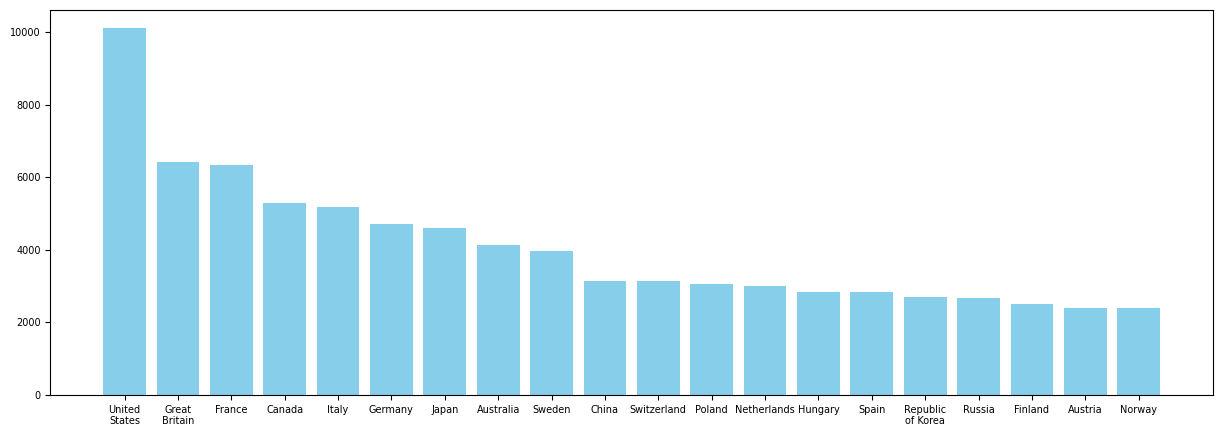

In [4]:
# Plot number of athletes per different country (matplotlib imported as plt, pandas imported as pd)

n = 20

# Take 20 countries with the most athletes for plotting
all = bios_clean['NOC'].value_counts()
single_national = all.sort_values(ascending=False)

# print(single_national.__contains__('Russia')) # Returns False => correct key name
single_national.rename(index={'Soviet Union' : 'Russia'}, inplace=True)
# print(single_national.__contains__('China')) # Returns False => correct key name
single_national.rename(index={'People\'s Republic of China' : 'China'}, inplace=True)

# Adapt key names for better visualisation
for key in single_national.head(n).keys():
    new_key = key.replace(' ', '\n')
    new_key = new_key.replace('of\n', 'of ')
    single_national.rename(index={key: new_key}, inplace=True)

# Set font size
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 7}
plt.rc('font', **font)

# Plot
fig, ax = plt.subplots()
ax.bar(single_national.head(n).index, single_national.head(n).values, color='skyblue')
fig.set_size_inches(15, 5)

### Number of medals per country (top 20)

Olympics from: 1896 - 2022


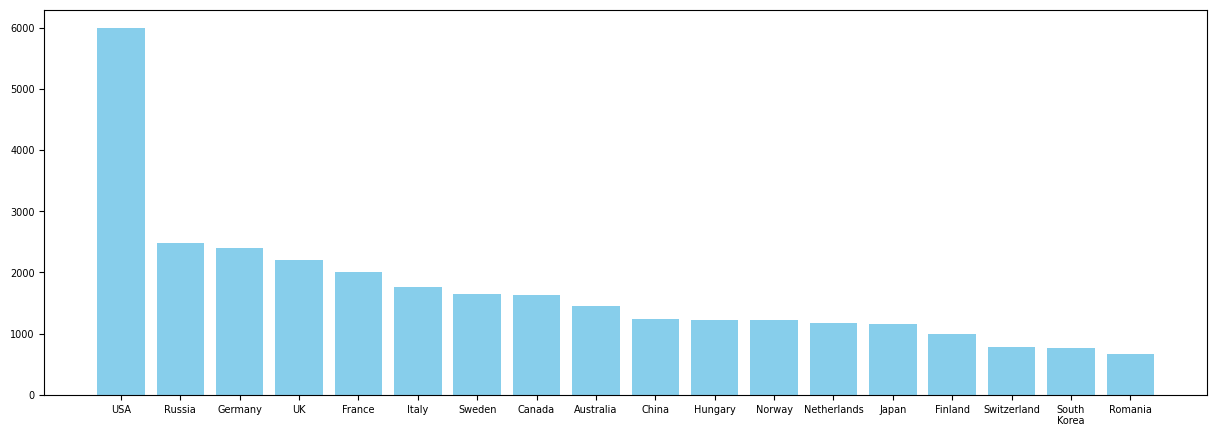

In [111]:
# Plot number of medals per country

n = 20

# Take 20 countries with the most medals for plotting
all_res = results.copy()
best = all_res.sort_values(by='medal', ascending=True)
only_medallists = best[(best['medal'] == 'Bronze') | (best['medal'] == 'Silver') | (best['medal'] == 'Gold')]

min_year = only_medallists['year'].min().astype(int)
max_year = only_medallists['year'].max().astype(int)
print(f"Olympics from: {min_year} - {max_year}")

# Count medals per country
medals = only_medallists['noc'].value_counts()
medals = medals.sort_values(ascending=False)

# Adapt key names for better visualisation
for key in medals.head(n).keys():
    new_key = countries[key]
    new_key = new_key.replace(' ', '\n')
    new_key = new_key.replace('of\n', 'of ')
    medals.rename(index={key: new_key}, inplace=True)

# Plot
fig_medals, ax_medals = plt.subplots()
ax_medals.bar(medals.head(n).index, medals.head(n).values, color='skyblue')
fig_medals.set_size_inches(15, 5)

### Number of medals and athletes per company by medal/athlete ratio (top 20)

Minimum number of athletes per city: 210


/var/folders/qk/q1gqpdyj7m50xh7lmjvf8ds80000gn/T/ipykernel_29810/2554078605.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_countries['noc'].replace(country, new_cname, inplace=True)


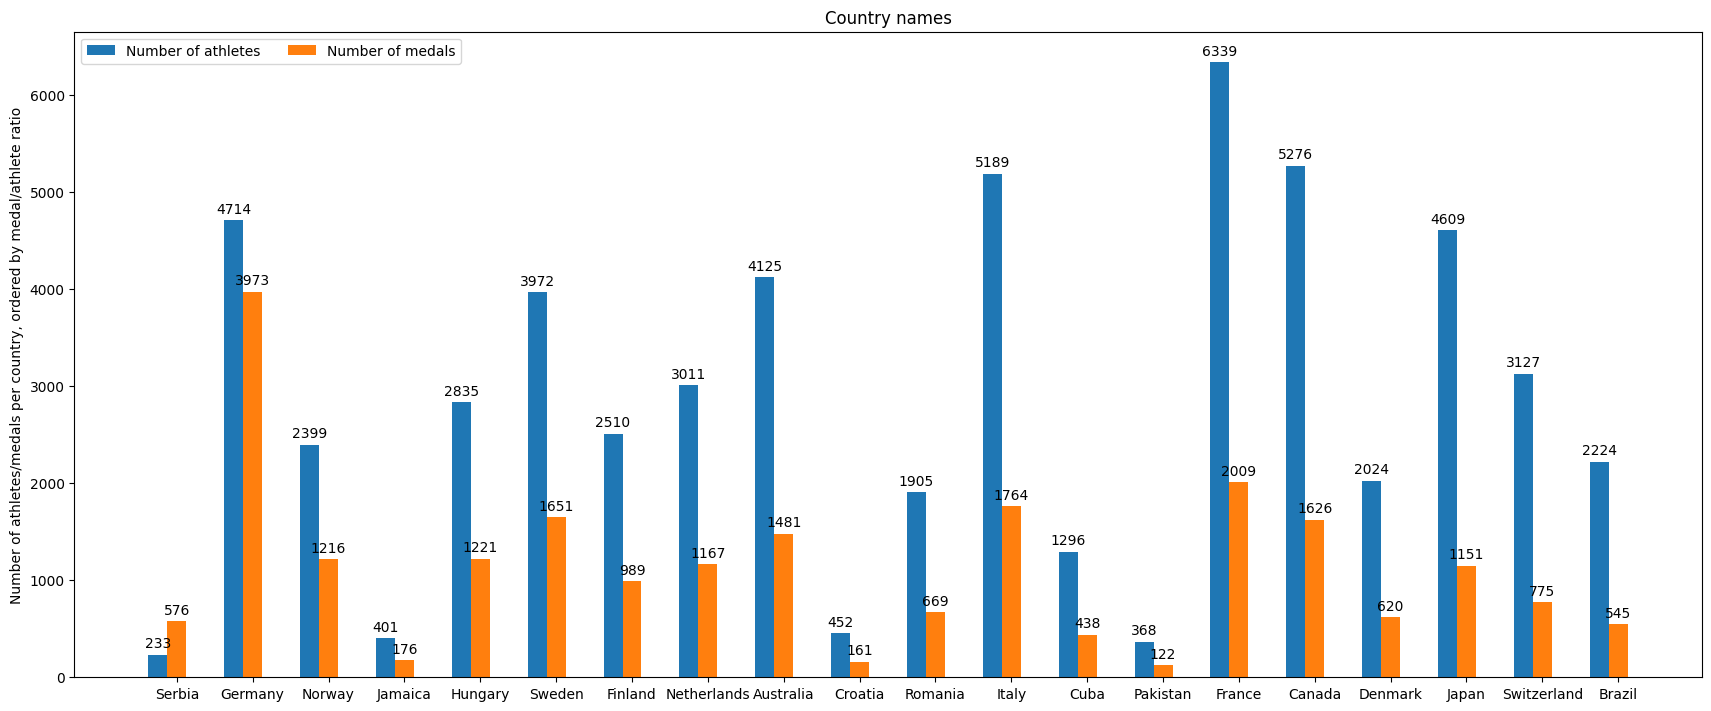

In [9]:
# Plot top 20 cities with best athletes/medallists ratio

n = 20

# Prepare DataFrames for merge
# Number of athletes
df_athletes = bios_clean['NOC'].value_counts().reset_index(name='num_athletes').sort_values(by='num_athletes', ascending=False)
df_athletes.rename(index={'Soviet Union' : 'Russia'}, inplace=True)
df_athletes.rename(index={'People\'s Republic of China' : 'China'}, inplace=True)

# BIG PROBLEM: Sometimes, the NOC ends up being the country name, sometimes it's the abbreviation. 
# To resolve this, we need to convert all NOCs to country names BEFORE counting the number of medals
# (the number of medals corresponds to the number of rows left, since each row corresponds to a medallist,
# because other athletes get filtered out in the very first step)

all_countries = noc_regions['region'].values.tolist()

# Number of medals per country
df_medallists = results[(results['medal'] == 'Gold') | (results['medal'] == 'Silver') | (results['medal'] == 'Bronze')]
df_medals = df_medallists.copy()

not_in_noc = ['SGP', 'LBN']
for noc in df_medals['noc']:
    if noc in not_in_noc or noc in all_countries:
        continue
    cname = countries[noc]
    df_medals.replace(noc, cname, inplace=True)
df_medals = df_medals.value_counts('noc').reset_index(name='num_medals')

# In case you want to check that each country figures only once in df_medals
# ctr = df_medals['noc']
# ctr2 = []
# for c in ctr:
#     if c in ctr2:
#         print(f"Error with {c}")
#     ctr2.append(c)


# Rename NOC column to noc for merge
df_athletes.rename(columns={'NOC': 'noc'}, inplace=True)

# Minimum number of athletes per city to be considered
min_athletes = df_athletes['num_athletes'].mean().__ceil__()
print(f"Minimum number of athletes per city: {min_athletes}")

# Merge DataFrames and create a new column "ratio" = medals / num_athletes
merged_nat_df = df_athletes.merge(df_medals, on="noc",how="inner") 
merged_nat_df["ratio"] = merged_nat_df["num_medals"] / merged_nat_df["num_athletes"]
top_countries = merged_nat_df[merged_nat_df["num_athletes"] >= min_athletes].sort_values(by='ratio', ascending=False)

# Adapt key names for better visualisation
for country in top_countries['noc'].head(n):
    new_cname = country.replace(' ', '\n')
    top_countries['noc'].replace(country, new_cname, inplace=True)

# Helper
def flatten(xss):
    return [x for xs in xss for x in xs]

# Plot

to_plot_names = ['Number of athletes', 'Number of medals']
country_list = top_countries['noc'].head(n).values.tolist()
country_stats = {
    to_plot_names[0] : flatten(top_countries[['num_athletes']].head(n).values.tolist()),
    to_plot_names[1] : flatten(top_countries[['num_medals']].head(n).values.tolist())
}

x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in country_stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of athletes/medals per country, ordered by medal/athlete ratio')
ax.set_title('Country names')
ax.set_xticks(x + width, country_list)
ax.legend(loc='upper left', ncols=len(to_plot_names))
fig.set_size_inches(17, 7)

plt.show()

### Number of American athletes per birthplace (top 20)

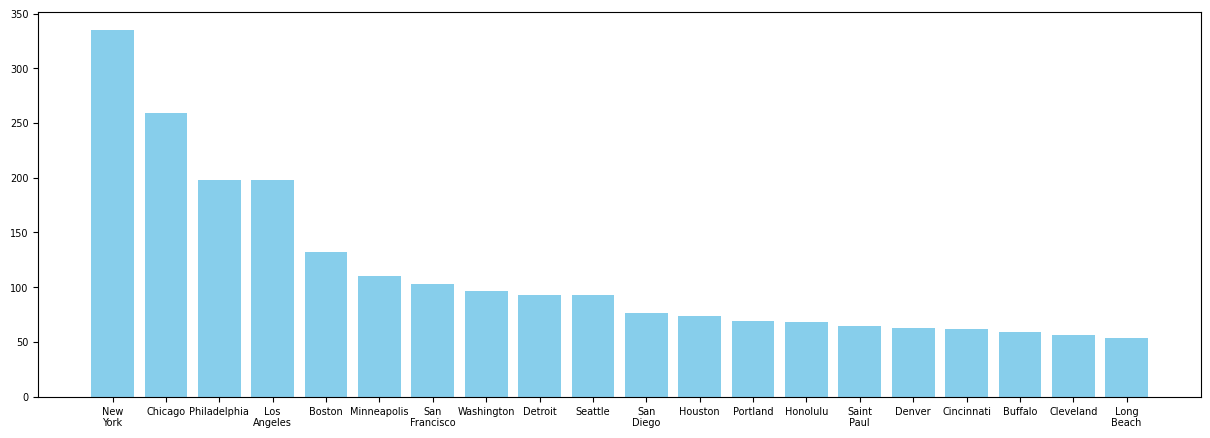

In [80]:
# Plot 20 most common birthplaces of American athletes

n = 20

# Take only data from USA
usa_data = bios_clean[bios_clean['NOC'] == 'United States'].sort_values(by='born_city', ascending=True)

# There exist multiple athletes with the same name, but they are not the same people added twice by accident so it is not a problem
# usa_data_by_name = usa_data['name'].value_counts().sort_values(ascending=False).head(10).keys().tolist()
# # display(usa_data_by_name)
# display((usa_data[usa_data['name'].isin(usa_data_by_name)]).sort_values(by='name', ascending=True))

# Count athletes per city
cities = usa_data['born_city'].value_counts().sort_values(ascending=False)

# Adapt key names for better visualisation
for key in cities.head(n).keys():
    new_key = key.replace(' ', '\n')
    cities.rename(index={key: new_key}, inplace=True)

# Plot
fig_cities, ax_cities = plt.subplots()
ax_cities.bar(cities.head(n).index, cities.head(n).values, color='skyblue')
fig_cities.set_size_inches(15, 5)

us_cities1 = cities.head(n).keys().tolist()

### Number of American medals per birthplace (top 20)

/var/folders/qk/q1gqpdyj7m50xh7lmjvf8ds80000gn/T/ipykernel_75167/2114290318.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medals_per_city['born_city'].replace(city, new_cname, inplace=True)


'Weak' cities: ['Minneapolis', 'Saint\nPaul', 'Denver', 'Buffalo']

'Strong' cities ['Baltimore', 'Madison', 'Oakland', 'Pittsburgh']


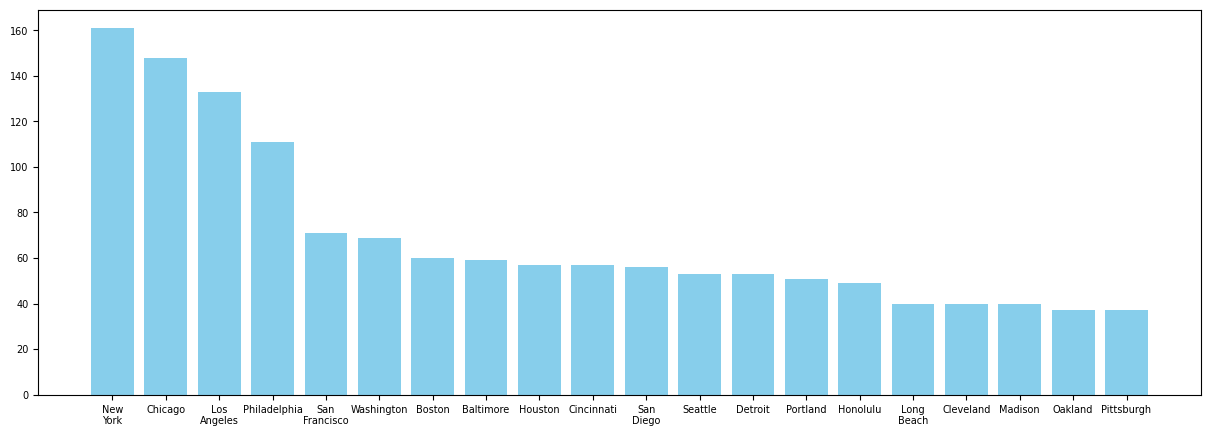

In [81]:
# Plot 20 most common birthplaces of American athletes

n = 20

# Take only data from USA
usa_medallists = results[results['noc'] == 'USA']
usa_medallists = usa_medallists[(usa_medallists['medal'] == 'Gold') | (usa_medallists['medal'] == 'Silver') | (usa_medallists['medal'] == 'Bronze')]

# Create dictionary lookup for athlete_id to birthplace
ids = usa_medallists['athlete_id'].values.tolist()
birthplaces = {}
for id in ids:
    birthplaces[id] = bios_locs[bios_locs['athlete_id'] == id]['born_city'].values[0]

# Map birthplaces to athlete_id in medallists DataFrame
usa_medallists['born_city'] = usa_medallists['athlete_id'].map(birthplaces)

# Count medals per city
medals_per_city = (usa_medallists.groupby('born_city').size().reset_index(name='medals').sort_values('medals', ascending=False))

# Adapt key names for better visualisation
for city in medals_per_city.head(n)['born_city']:
    new_cname = city.replace(' ', '\n')
    medals_per_city['born_city'].replace(city, new_cname, inplace=True)

# Plot
fig_medals, ax_medals = plt.subplots()
ax_medals.bar(medals_per_city['born_city'].head(n), medals_per_city['medals'].head(n), color='skyblue')
fig_medals.set_size_inches(15, 5)

us_cities2 = medals_per_city['born_city'].head(n).values.tolist()
# Cities in the top 20 of most common birthplaces of American athletes not in top 20 of cities with most medals
diff1 = [value for value in us_cities1 if not value in us_cities2]
# Cities in the top 20 of cities with most medals not in top 20 of most common birthplaces of American athletes
diff2 = [value for value in us_cities2 if not value in us_cities1]
print(f"\'Weak\' cities: {diff1}\n")
print(f"\'Strong\' cities {diff2}")

### Best cities relative to number of athletes competing (top 20)

/var/folders/qk/q1gqpdyj7m50xh7lmjvf8ds80000gn/T/ipykernel_75167/780602411.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_cities['born_city'].replace(city, new_cname, inplace=True)


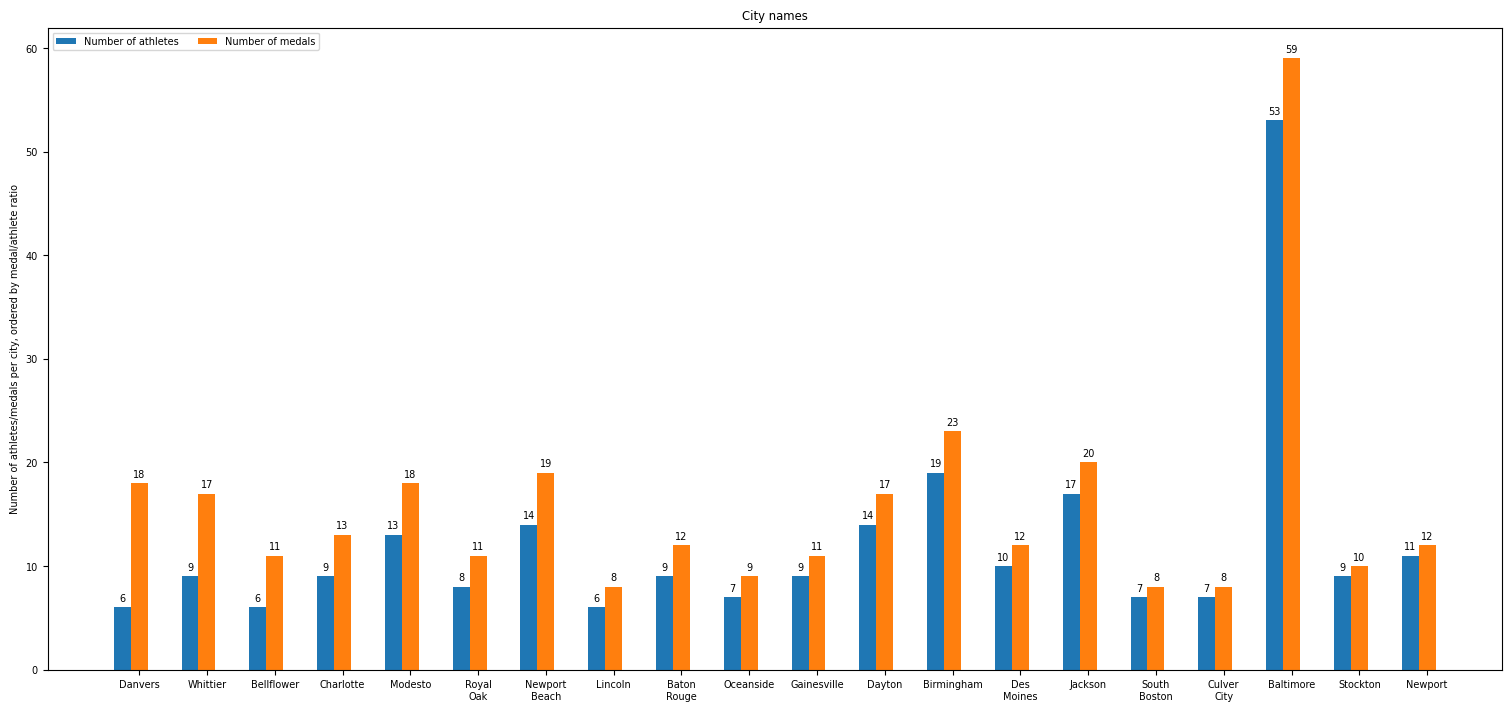

In [138]:
# Plot top 20 cities with best athletes/medallists ratio

n = 20

# Count athletes to medallists ratio for each city
df_cities = cities.reset_index(name='num_athletes')

# Minimum number of athletes per city to be considered
min_athletes = 6 # df_cities['num_athletes'].mean().__ceil__()
# print(f"Minimum number of athletes per city: {min_athletes}")

# Merge DataFrames and create a new column "ratio" = medals / num_athletes
merged_df = df_cities.merge(medals_per_city, on="born_city",how="inner")
merged_df["ratio"] = merged_df["medals"] / merged_df["num_athletes"]
top_cities = merged_df[merged_df["num_athletes"] >= min_athletes].sort_values(by='ratio', ascending=False)

# Adapt key names for better visualisation
for city in top_cities['born_city'].head(n):
    new_cname = city.replace(' ', '\n')
    top_cities['born_city'].replace(city, new_cname, inplace=True)

# Helper
def flatten(xss):
    return [x for xs in xss for x in xs]

# Plot

to_plot_names = ['Number of athletes', 'Number of medals']

city_list = top_cities['born_city'].head(n).values.tolist()
city_stats = {
    to_plot_names[0] : flatten(top_cities[['num_athletes']].head(n).values.tolist()),
    to_plot_names[1] : flatten(top_cities[['medals']].head(n).values.tolist())
}

x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in city_stats.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of athletes/medals per city, ordered by medal/athlete ratio')
ax.set_title('City names')
ax.set_xticks(x + width, city_list)
ax.legend(loc='upper left', ncols=len(to_plot_names))
fig.set_size_inches(15, 7)

plt.show()

### Evolution of the proportion of women to men over the years

Olympics from: 1888 - 2022


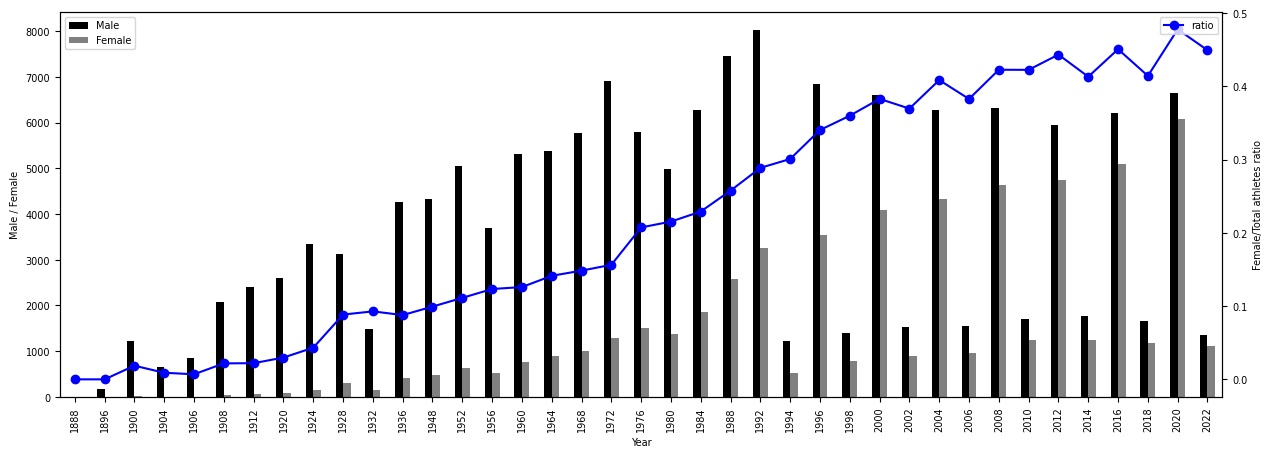

In [ ]:
gender_info = unclean_bios.copy().drop(columns=['Roles', 'Full name', 'Used name', 'Born', 'Died', 'NOC', 
    'Measurements', 'Affiliations', 'Nick/petnames', 'Title(s)', 'Other names', 'Nationality', 'Original name', 'Name order'])
# display(gender_info.head())

# Columns: ['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC', 
# 'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
# 'Title(s)', 'Other names', 'Nationality', 'Original name', 'Name order']

games_info = unclean_results.copy().drop(columns=['Unnamed: 7', 'Team', 'As', 'NOC', 'Discipline', 'Nationality', 'Pos', 'Medal', 'Event'])
# display(games_info.head())

# Columns: ['Games', 'Event', 'Team', 'Pos', 'Medal', 'As', 'athlete_id', 'NOC', 
# 'Discipline', 'Nationality', 'Unnamed: 7']

# Parse out year from games column
games_info['year'] = games_info['Games'].str.extract(r'(\d{4})')
games_info.drop(columns=['Games'], inplace=True)

# Merge DataFrames on athlete_id
df_merged = games_info.merge(gender_info, on='athlete_id', how='inner')

# Now need to remove when athlete is contained multiple times per year,
# but since each row should be unique, we can just drop duplicates
df_merged.drop_duplicates(inplace=True)

# Count number of male and female athletes per year
mw_per_year = df_merged.groupby(['year', 'Sex']).size().unstack(fill_value=0).reset_index()
mw_per_year.rename_axis(None, axis=1, inplace=True)

# Add total athletes per year and then the ratio
mw_per_year['ratio'] = mw_per_year['Female'] / (mw_per_year['Female'] + mw_per_year['Male'])

min_year = mw_per_year['year'].min()
max_year = mw_per_year['year'].max()
print(f"Olympics from: {min_year} - {max_year}")

# Plot the bars with a pandas.DataFrame.plot and assign the plot to ax
ax = mw_per_year.plot.bar(x='year', y=['Male', 'Female'], ylabel='Male / Female', xlabel='Year', color=['black', 'gray'], figsize=(15, 5))

# Create ax2
ax2 = ax.twinx()

# Plot the lines
mw_per_year.plot(x='year', y=['ratio'], marker='o', ylabel='Female/Total athletes ratio', color=['blue', 'lightblue'], ax=ax2)

# locate the legend
ax.legend(loc="upper left")
ax2.legend(loc='upper right')

plt.show()